      Group           Experiment  Embryo  Hour  # Quiescence
0       Ctl  20240829-vglutdfctl     1.0   1.0           4.0
1       Ctl  20240829-vglutdfctl     1.0   2.0           5.0
2       Ctl  20240829-vglutdfctl     1.0   3.0           3.0
3       Ctl  20240829-vglutdfctl     1.0   4.0           3.0
4       Ctl  20240829-vglutdfctl     1.0   5.0           NaN
..      ...                  ...     ...   ...           ...
374  VGluT-     20240828-vglutdf    11.0   5.0           4.0
375  VGluT-     20240828-vglutdf    11.0   6.0           1.0
376  VGluT-     20240828-vglutdf    11.0   7.0           0.0
377  VGluT-     20240828-vglutdf    11.0   8.0           0.0
378  VGluT-     20240828-vglutdf    11.0   9.0           NaN

[379 rows x 5 columns]


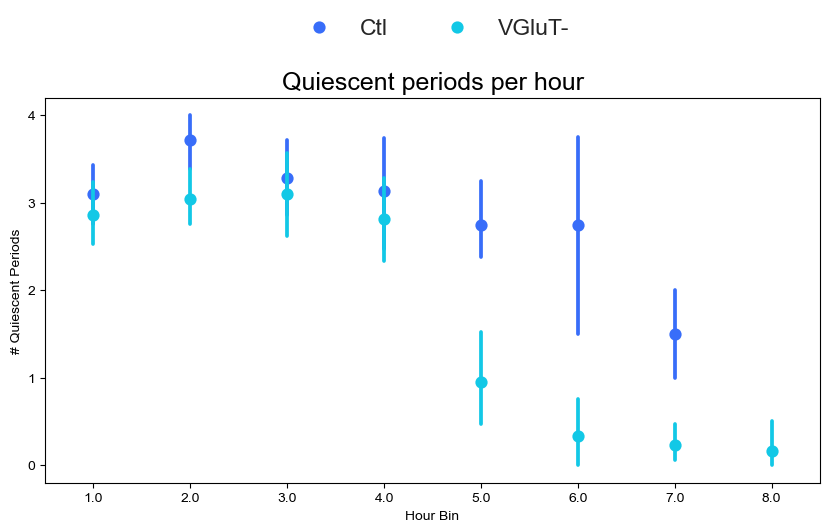

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read csv file into pandas dataframe
filename = 'vglut experiment - quiescence frequency.csv'
csv_path = Path.cwd().parent.joinpath('data', filename)
dataframe = pd.read_csv(csv_path, na_values=['x', '-'])
print(dataframe)

dataframe = dataframe[dataframe.Hour != 9.0] # remove hour 9

# line plot
fig, ax = plt.subplots(figsize=(10, 5))
font_scale = 1.5
sns.set_theme(style='whitegrid', palette='rainbow', font_scale=font_scale)
ax = sns.pointplot(data=dataframe, x='Hour', y='# Quiescence', linestyle='None', hue='Group', errorbar='ci')
# ax = sns.lineplot(data=dataframe, x='Hour', y='# Quiescence', hue='Group')
# ax = sns.catplot(data=dataframe, x='Hour', y='# Quiescence', kind='box', hue='Group', height=5, aspect=2)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1.1), ncol=3, title=None, frameon=False,)
ax.set_title(f'Quiescent periods per hour')
ax.set_xlabel('Hour Bin')
ax.set_ylabel('# Quiescent Periods');

,Group,Experiment,Embryo,Hour,# Quiescence
0,wt,2024061125C,1.0,1.0,3.0
1,wt,2024061125C,1.0,2.0,3.0
2,wt,2024061125C,1.0,3.0,4.0
3,wt,2024061125C,1.0,4.0,NaN
4,wt,2024061125C,1.0,5.0,NaN
...,...,...,...,...,...
697,VGAT-,20241010vgatdf,15.0,4.0,3.0
698,VGAT-,20241010vgatdf,15.0,5.0,5.0
699,VGAT-,20241010vgatdf,15.0,6.0,3.0
700,VGAT-,20241010vgatdf,15.0,7.0,2.0


wt vs vglut hour 2 TtestResult(statistic=np.float64(1.9660770979457844), pvalue=np.float64(0.0543453706274686), df=np.float64(55.0))
wt vs vgat hour 5 TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))


,Group,Experiment,Embryo,Hour,# Quiescence


,Group,Experiment,Embryo,Hour,# Quiescence
518,VGAT-,20241008vgatdf,1.0,5.0,1.0
617,VGAT-,20241011vgatdf,3.0,5.0,2.0
626,VGAT-,20241011vgatdf,5.0,5.0,2.0
644,VGAT-,20241011vgatdf,7.0,5.0,2.0
653,VGAT-,20241011vgatdf,8.0,5.0,4.0
662,VGAT-,20241011vgatdf,13.0,5.0,2.0
671,VGAT-,20241011vgatdf,14.0,5.0,2.0
680,VGAT-,20241010vgatdf,10.0,5.0,4.0
689,VGAT-,20241010vgatdf,14.0,5.0,3.0
698,VGAT-,20241010vgatdf,15.0,5.0,5.0


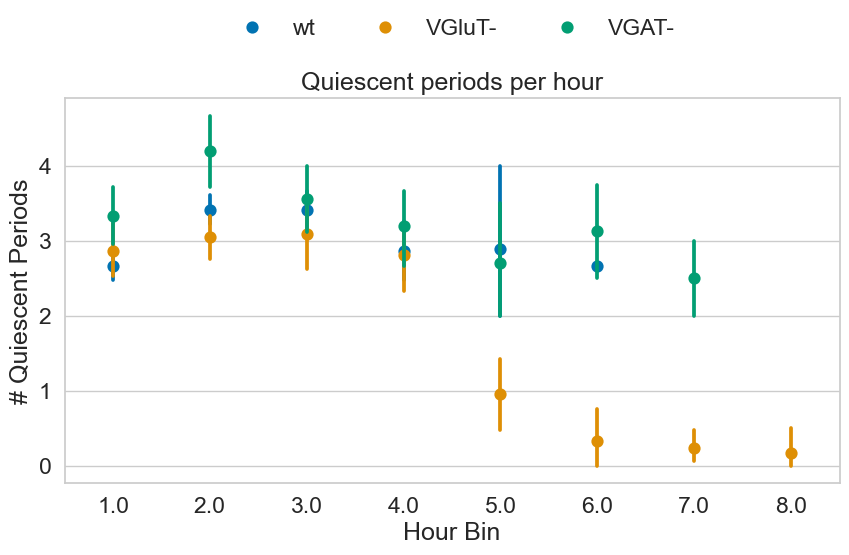

In [66]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind 

# read csv file into pandas dataframe
filename = 'all - quiescence frequency.csv'
csv_path = Path.cwd().parent.joinpath('data', filename)
dataframe = pd.read_csv(csv_path, na_values=['x', '-'])
display(dataframe)

dataframe = dataframe[dataframe.Hour != 9.0] # remove hour 9

# line plot
fig, ax = plt.subplots(figsize=(10, 5))
font_scale = 1.5
sns.set_theme(style='whitegrid', palette='colorblind', font_scale=font_scale)
ax = sns.pointplot(data=dataframe, x='Hour', y='# Quiescence', linestyle='None', hue='Group', errorbar='ci')
# ax = sns.lineplot(data=dataframe, x='Hour', y='# Quiescence', hue='Group')
# ax = sns.catplot(data=dataframe, x='Hour', y='# Quiescence', kind='box', hue='Group', height=5, aspect=2)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1.1), ncol=3, title=None, frameon=False,)
ax.set_title(f'Quiescent periods per hour')
ax.set_xlabel('Hour Bin')
ax.set_ylabel('# Quiescent Periods');

wt_hour2 = dataframe[(dataframe['Group']=='wt') & (dataframe['Hour'] ==2)]
vglut_hour2 = dataframe[(dataframe['Group']=='VGluT-') & (dataframe['Hour'] ==2)]
print('wt vs vglut hour 2', ttest_ind(wt_hour2['# Quiescence'], vglut_hour2['# Quiescence']))

dataframe = dataframe.dropna(axis='index', how='any')
wt_hour5 = dataframe[(dataframe['Group']=='wt') & (dataframe['Hour'] ==5)]
vgat_hour5 = dataframe[(dataframe['Group']=='VGAT-') & (dataframe['Hour'] ==5)]
print('wt vs vgat hour 5', ttest_ind(wt_hour5['# Quiescence'], vgat_hour5['# Quiescence']))
display(wt_hour5)
display(vgat_hour5)

plt.savefig('quiescence_new.svg')

,Group,Experiment,Embryo,Hour,# Quiescence
0,wt,2024061125C,1.0,1.0,3.0
1,wt,2024061125C,1.0,2.0,3.0
2,wt,2024061125C,1.0,3.0,4.0
3,wt,2024061125C,1.0,4.0,NaN
4,wt,2024061125C,1.0,5.0,NaN
...,...,...,...,...,...
641,VGAT-,20241010vgatdf,15.0,4.0,3.0
642,VGAT-,20241010vgatdf,15.0,5.0,5.0
643,VGAT-,20241010vgatdf,15.0,6.0,3.0
644,VGAT-,20241010vgatdf,15.0,7.0,2.0


wt vs vglut hour 5 TtestResult(statistic=np.float64(2.5604276319371975), pvalue=np.float64(0.01783877164708939), df=np.float64(22.0))
wt vs vgat hour 2 TtestResult(statistic=np.float64(-3.3050156959876444), pvalue=np.float64(0.0016755846414313383), df=np.float64(55.0))


,Group,Experiment,Embryo,Hour,# Quiescence
140,wt,2024091925C,5.0,5.0,2.000
180,wt,2024091925C,10.0,5.0,4.000
276,wt,2024091925C,22.0,5.0,2.666


,Group,Experiment,Embryo,Hour,# Quiescence
482,VGAT-,20241008vgatdf,1.0,5.0,1.0
570,VGAT-,20241011vgatdf,3.0,5.0,2.0
578,VGAT-,20241011vgatdf,5.0,5.0,2.0
594,VGAT-,20241011vgatdf,7.0,5.0,2.0
602,VGAT-,20241011vgatdf,8.0,5.0,4.0
610,VGAT-,20241011vgatdf,13.0,5.0,2.0
618,VGAT-,20241011vgatdf,14.0,5.0,2.0
626,VGAT-,20241010vgatdf,10.0,5.0,4.0
634,VGAT-,20241010vgatdf,14.0,5.0,3.0
642,VGAT-,20241010vgatdf,15.0,5.0,5.0


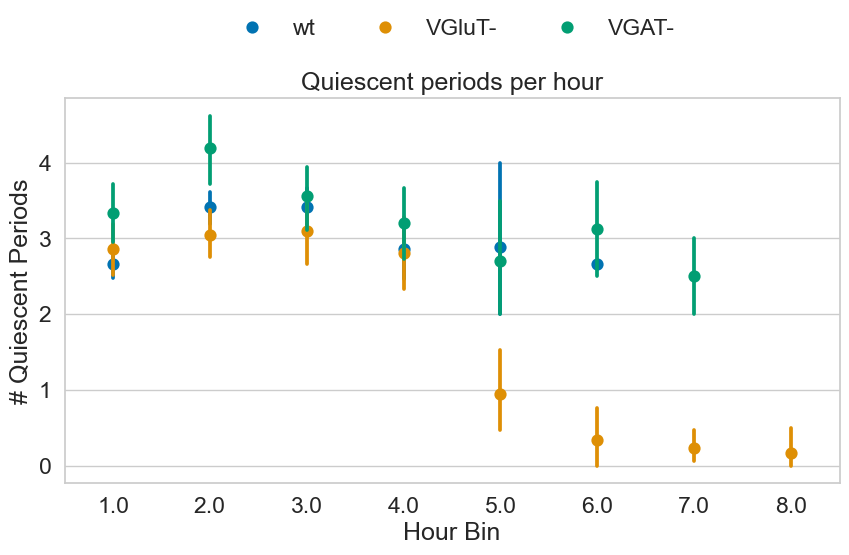

In [65]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind 

# read csv file into pandas dataframe
filename = 'all - quiescence frequency - new.csv'
csv_path = Path.cwd().parent.joinpath('data', filename)
dataframe = pd.read_csv(csv_path, na_values=['x', '-'])
display(dataframe)

dataframe = dataframe[dataframe.Hour != 9.0] # remove hour 9

# line plot
fig, ax = plt.subplots(figsize=(10, 5))
font_scale = 1.5
sns.set_theme(style='whitegrid', palette='colorblind', font_scale=font_scale)
ax = sns.pointplot(data=dataframe, x='Hour', y='# Quiescence', linestyle='None', hue='Group', errorbar='ci')
# ax = sns.lineplot(data=dataframe, x='Hour', y='# Quiescence', hue='Group')
# ax = sns.catplot(data=dataframe, x='Hour', y='# Quiescence', kind='box', hue='Group', height=5, aspect=2)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1.1), ncol=3, title=None, frameon=False,)
ax.set_title(f'Quiescent periods per hour')
ax.set_xlabel('Hour Bin')
ax.set_ylabel('# Quiescent Periods');

dataframe = dataframe.dropna(axis='index', how='any')

wt_hour5 = dataframe[(dataframe['Group']=='wt') & (dataframe['Hour'] ==5)]
vglut_hour5 = dataframe[(dataframe['Group']=='VGluT-') & (dataframe['Hour'] ==5)]
print('wt vs vglut hour 5', ttest_ind(wt_hour5['# Quiescence'], vglut_hour5['# Quiescence']))

wt_hour2 = dataframe[(dataframe['Group']=='wt') & (dataframe['Hour'] ==2)]
vgat_hour2 = dataframe[(dataframe['Group']=='VGAT-') & (dataframe['Hour'] ==2)]
print('wt vs vgat hour 2', ttest_ind(wt_hour2['# Quiescence'], vgat_hour2['# Quiescence']))
display(wt_hour5)
display(vgat_hour5)

plt.savefig('quiescence_new.svg')